In [1]:
import pandas as pd

In [2]:
df=pd.read_parquet('staging/url/transformed.parquet')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wiki_id  1372 non-null   object
 1   url      682 non-null    object
dtypes: object(2)
memory usage: 21.6+ KB


,wiki_id,url
0,Q43436,https://en.wikipedia.org/wiki/Pearl
1,Q43088,https://en.wikipedia.org/wiki/Ruby
2,Q5283,https://en.wikipedia.org/wiki/Diamond
3,Q573870,https://en.wikipedia.org/wiki/Bi_(jade)
4,Q612430,None


In [3]:
import requests
from bs4 import BeautifulSoup
def page_from_url(url = "https://en.wikipedia.org/wiki/Ruby"):
    # Define the URL of the Wikipedia page
    
    
    # Send a request to fetch the page content
    response = requests.get(url)
    
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")
    h1_title = soup.find('h1').get_text()
    # Extract the main content of the page (text within the <p> tags)
    paragraphs = soup.find_all('p')
    
    # Concatenate the text from all paragraphs
    page_text = '\n'.join([para.get_text() for para in paragraphs])
    if page_text is not None:
        return h1_title+page_text
    raise Exception(f"Page {title} does not exist.")

page_from_url()[:300]

'Ruby\n\nRuby is a pinkish red to blood-red colored gemstone, a variety of the mineral corundum (aluminium oxide). Ruby is one of the most popular traditional jewelry gems and is very durable. Other varieties of gem-quality corundum are called sapphires. Ruby is one of the traditional cardinal gems, al'

In [4]:
from monadsquishy import Squishy, sf
sq_config = {
    'transformations':[
        {
            'input_table': df,
            'transformed_path':'./staging/page',
            'exploded_path':'./staging/page',
            'out_columns': {
                 'wiki_id': {
                     'input':'wiki_id',
                     'funcs':[lambda x:x, ],
                 },
                 'url': {
                     'input':'url',
                     'funcs':[lambda x:x, ],
                 },
                 'page': {
                     'input':'url',
                     'funcs':[page_from_url, ],
                 },
             }
        }
    ]
}
sq=Squishy(sq_config)
sq.run()

1/3 Output: wiki_id
Input: wiki_id             
Process: ['<lambda>']


  0%|          | 0/1372 [00:00<?, ?it/s]

2/3 Output: url
Input: url                 
Process: ['<lambda>']


  0%|          | 0/1372 [00:00<?, ?it/s]

3/3 Output: page
Input: url                 
Process: ['page_from_url']


  0%|          | 0/1372 [00:00<?, ?it/s]

>> Finished transformations!


In [5]:
sq.clean_report()

,input_column,output_column,message,clean_count
2,wiki_id,wiki_id,Passed: <lambda>(),1372
1,url,url,Passed: <lambda>(),1372
0,url,page,Passed: page_from_url(),682


In [6]:
sq.output()

,wiki_id,url,page
0,Q43436,https://en.wikipedia.org/wiki/Pearl,"Pearl\n\nA pearl is a hard, glistening object ..."
1,Q43088,https://en.wikipedia.org/wiki/Ruby,Ruby\n\nRuby is a pinkish red to blood-red col...
2,Q5283,https://en.wikipedia.org/wiki/Diamond,Diamond\n\nDiamond is a solid form of the elem...
3,Q573870,https://en.wikipedia.org/wiki/Bi_(jade),Bi (jade)\n\nThe bi (Chinese: 璧) is a type of ...
4,Q612430,None,None
...,...,...,...
1367,Q483958,"https://en.wikipedia.org/wiki/Okanogan_County,...","Okanogan County, Washington\n\nOkanogan County..."
1368,Q122510,None,None
1369,Q7972122,https://en.wikipedia.org/wiki/Washington_Pass,Washington PassWashington Pass (el. 5477 ft./1...
1370,Q6731423,https://en.wikipedia.org/wiki/Magnet_Cove_igne...,Magnet Cove igneous complexThe Magnet Cove ign...


In [7]:
df_page=pd.read_parquet('staging/page/transformed.parquet')
df_page.info()
df_page.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   wiki_id  1372 non-null   object
 1   url      682 non-null    object
 2   page     682 non-null    object
dtypes: object(3)
memory usage: 32.3+ KB


,wiki_id,url,page
0,Q43436,https://en.wikipedia.org/wiki/Pearl,"Pearl\n\nA pearl is a hard, glistening object ..."
1,Q43088,https://en.wikipedia.org/wiki/Ruby,Ruby\n\nRuby is a pinkish red to blood-red col...
2,Q5283,https://en.wikipedia.org/wiki/Diamond,Diamond\n\nDiamond is a solid form of the elem...
3,Q573870,https://en.wikipedia.org/wiki/Bi_(jade),Bi (jade)\n\nThe bi (Chinese: 璧) is a type of ...
4,Q612430,None,None


In [8]:
sq_config = {
    'transformations':[
        {
            'input_table': df_page,
            'transformed_path':'./staging/text',
            'exploded_path':'./staging/text',
            'out_columns': {
                 'wiki_id': {
                     'input':'wiki_id',
                     'funcs':[lambda x:x, ],
                 },
                 'url': {
                     'input':'url',
                     'funcs':[lambda x:x, ],
                 },
                 'page': {
                     'input':'page',
                     'funcs':[lambda x:x, ],
                 },
                'len_text': {
                     'input':'page',
                     'funcs':[lambda x:len(x), ],
                 },
             }
        }
    ]
}
sq=Squishy(sq_config)
sq.run()

1/4 Output: wiki_id
Input: wiki_id             
Process: ['<lambda>']


  0%|          | 0/1372 [00:00<?, ?it/s]

2/4 Output: url
Input: url                 
Process: ['<lambda>']


  0%|          | 0/1372 [00:00<?, ?it/s]

3/4 Output: page
Input: page                
Process: ['<lambda>']


  0%|          | 0/1372 [00:00<?, ?it/s]

4/4 Output: len_text
Input: page                
Process: ['<lambda>']


  0%|          | 0/1372 [00:00<?, ?it/s]

>> Finished transformations!


In [9]:
sq.clean_report()

,input_column,output_column,message,clean_count
3,wiki_id,wiki_id,Passed: <lambda>(),1372
2,url,url,Passed: <lambda>(),1372
1,page,page,Passed: <lambda>(),1372
0,page,len_text,Passed: <lambda>(),682


In [10]:
df_text=sq.output()
df_text.info()
df_text.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wiki_id   1372 non-null   object 
 1   url       682 non-null    object 
 2   page      682 non-null    object 
 3   len_text  682 non-null    float64
dtypes: float64(1), object(3)
memory usage: 43.0+ KB


,wiki_id,url,page,len_text
0,Q43436,https://en.wikipedia.org/wiki/Pearl,"Pearl\n\nA pearl is a hard, glistening object ...",38359.0
1,Q43088,https://en.wikipedia.org/wiki/Ruby,Ruby\n\nRuby is a pinkish red to blood-red col...,13666.0
2,Q5283,https://en.wikipedia.org/wiki/Diamond,Diamond\n\nDiamond is a solid form of the elem...,61340.0
3,Q573870,https://en.wikipedia.org/wiki/Bi_(jade),Bi (jade)\n\nThe bi (Chinese: 璧) is a type of ...,3694.0
4,Q612430,None,None,NaN


In [11]:
df_text.describe()

,len_text
count,682.000000
mean,14463.299120
std,21296.746787
min,35.000000
25%,1801.500000
50%,5295.000000
75%,17912.250000
max,117890.000000


array([[<Axes: title={'center': 'len_text'}>]], dtype=object)

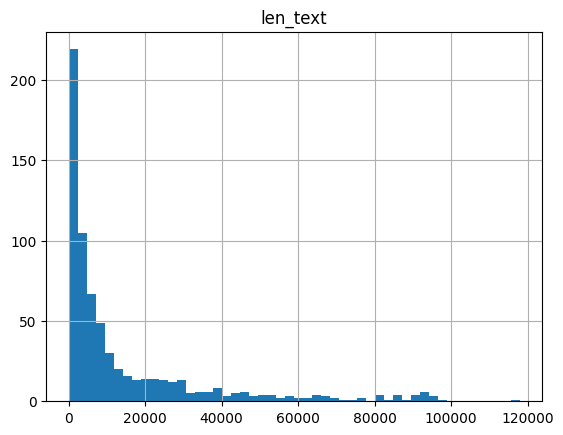

In [12]:
df_text[['len_text']].hist(bins=50)

In [13]:
df_text.sort_values('len_text',ascending=True).head(50)

,wiki_id,url,page,len_text
715,Q226841,https://en.wikipedia.org/wiki/Invincible,InvincibleInvincible may refer to:\n,35.0
892,Q16155169,https://en.wikipedia.org/wiki/List_of_jeweller...,List of jewellery designers\nThis is a list of...,136.0
233,Q16968794,https://en.wikipedia.org/wiki/Etowah_marble,"Etowah marbleEtowah marble, also called Georgi...",171.0
1027,Q7049337,https://en.wikipedia.org/wiki/Nong_district,Nong district Nong is a district (muang) of Sa...,171.0
172,Q30673636,https://en.wikipedia.org/wiki/Chief_Engraver_o...,Chief Engraver of the Royal Mint\nChief Engrav...,180.0
807,Q2148649,https://en.wikipedia.org/wiki/Bon%C3%A4s,BonäsBonäs is a locality situated in Mora Muni...,221.0
293,Q3909330,https://en.wikipedia.org/wiki/Portoro_Buono,Portoro BuonoPorto Buono is a decorative stone...,224.0
503,Q2252771,https://en.wikipedia.org/wiki/Ottrelite,OttreliteOttrelite is a form of chloritoid. It...,244.0
690,Q5516417,https://en.wikipedia.org/wiki/Gadolinium-doped...,Gadolinium-doped yttrium aluminium garnetGadol...,253.0
1244,Q4348381,https://en.wikipedia.org/wiki/Oswald_Kairamo,"Oswald KairamoOswald Kairamo (4 October 1858, ...",270.0
